In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler , OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split as tts 
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings



In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [5]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [6]:
num_feat=X.select_dtypes(exclude='object').columns
cat_feat=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_trans=StandardScaler()
one_hot_trans=OneHotEncoder()

process=ColumnTransformer(
    [
        ('Onehot_encod',one_hot_trans,cat_feat),
        ('StandardScaler',num_trans,num_feat)
    ]
)

In [7]:
X=process.fit_transform(X)


In [8]:
X.shape

(1000, 19)

In [9]:
from sklearn.model_selection import train_test_split as tts 
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

X_train.shape , X_test.shape

((800, 19), (200, 19))

In [10]:
#### Evaluation function 

def eval(true ,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=root_mean_squared_error(true,predicted)
    r2_s=r2_score(true,predicted)

    return mae,mse,rmse,r2_s

In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "CatBoost": CatBoostRegressor(verbose=False),
    "AdaBoost": AdaBoostRegressor()
}

# Evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Storage
model_list = []
r2_list = []

# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(f"🔹 {name}")
    print("Model performance for Training set:")
    print(f"- RMSE: {model_train_rmse:.4f}")
    print(f"- MAE: {model_train_mae:.4f}")
    print(f"- R2: {model_train_r2:.4f}")

    print("\nModel performance for Test set:")
    print(f"- RMSE: {model_test_rmse:.4f}")
    print(f"- MAE: {model_test_mae:.4f}")
    print(f"- R2: {model_test_r2:.4f}")
    print("=" * 40, "\n")

    model_list.append(name)
    r2_list.append(model_test_r2)

🔹 Linear Regression
Model performance for Training set:
- RMSE: 5.3231
- MAE: 4.2667
- R2: 0.8743

Model performance for Test set:
- RMSE: 5.3940
- MAE: 4.2148
- R2: 0.8804

🔹 Lasso
Model performance for Training set:
- RMSE: 6.5938
- MAE: 5.2063
- R2: 0.8071

Model performance for Test set:
- RMSE: 6.5197
- MAE: 5.1579
- R2: 0.8253

🔹 Ridge
Model performance for Training set:
- RMSE: 5.3233
- MAE: 4.2650
- R2: 0.8743

Model performance for Test set:
- RMSE: 5.3904
- MAE: 4.2111
- R2: 0.8806

🔹 KNN Regressor
Model performance for Training set:
- RMSE: 5.7077
- MAE: 4.5167
- R2: 0.8555

Model performance for Test set:
- RMSE: 7.2530
- MAE: 5.6210
- R2: 0.7838

🔹 Decision Tree
Model performance for Training set:
- RMSE: 0.2795
- MAE: 0.0187
- R2: 0.9997

Model performance for Test set:
- RMSE: 7.8125
- MAE: 6.2650
- R2: 0.7492

🔹 Random Forest
Model performance for Training set:
- RMSE: 2.2940
- MAE: 1.8095
- R2: 0.9767

Model performance for Test set:
- RMSE: 6.0130
- MAE: 4.6629
- R2: 

In [12]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoost,0.851632
5,Random Forest,0.851414
8,AdaBoost,0.846122
6,XGBoost,0.827797
1,Lasso,0.825320
3,KNN Regressor,0.783813
4,Decision Tree,0.749176


C:\Users\Admin\AppData\Local\Temp\ipykernel_20208\2110871566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2_Score", y="Model Name", data=results_df, palette="viridis")


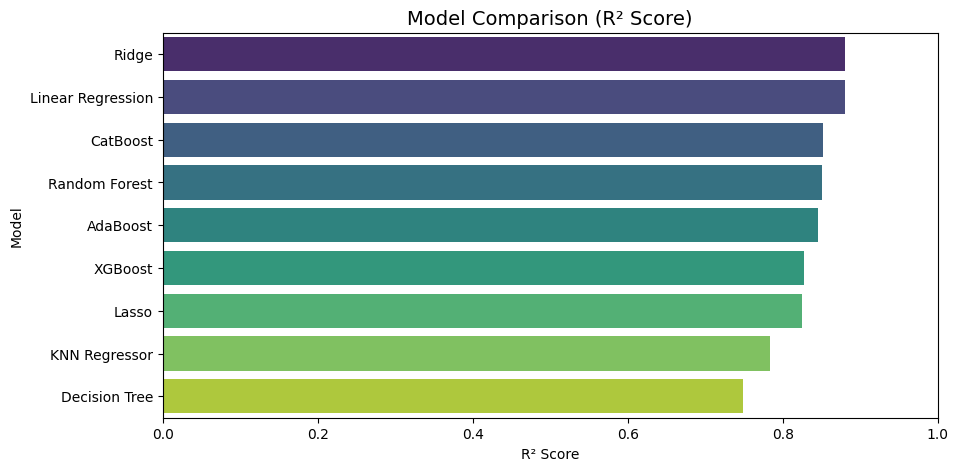

In [13]:


results_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])
results_df = results_df.sort_values(by="R2_Score", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="R2_Score", y="Model Name", data=results_df, palette="viridis")
plt.title("Model Comparison (R² Score)", fontsize=14)
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()


In [17]:
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)

y_pred=ridge_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy is ", score)


Accuracy is  88.05931485028738


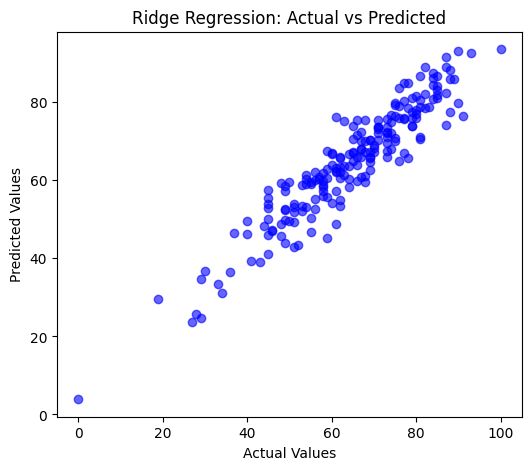

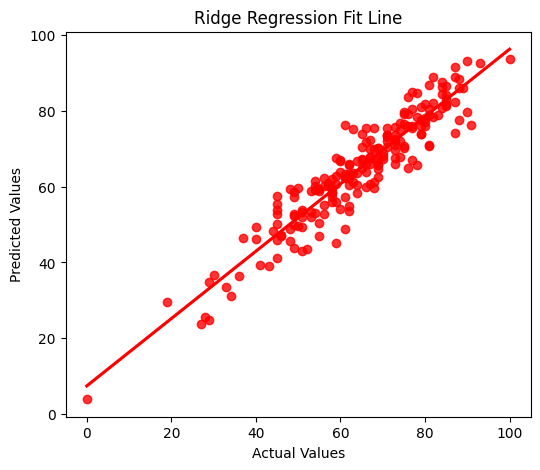

In [20]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()

# Regression Fit Line
plt.figure(figsize=(6, 5))
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression Fit Line")
plt.show()

In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
